In [1]:
import numpy as np
import matplotlib.pyplot as plt

from OpticalESRFunctions import FineStructureHam
from OpticalESRFunctions import FiveLevelModel

------------------------------------------------- 
                      Hello!       
------------------------------------------------- 
I am the helper function for the FineStructureHam 
class. The purpose of this class is to generate 
functions required to simulate the Hamiltonian of 
the NV center, and other isoelectronic systems. 
-------------------------------------------------  
For help with the model and model parameters, 
please use GetHamHelp().  
------------------------------------------------- 
------------------------------------------------- 
          Fine-Structure Hamiltonian Help      
------------------------------------------------- 
This model uses two dictionaries - one to calculate
the Hamiltonian, one to calculate the optical spectrum
------------------------------------------------- 
                     HamDict 
------------------------------------------------- 
Dgs, Des are the ground (excited) state ZFS in GHz
lambdaz is the axial spin-orbit strength in G

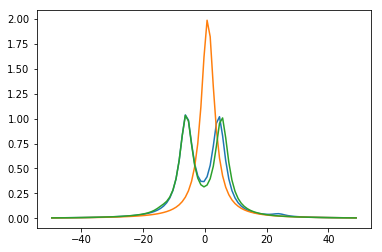

In [2]:
# Simulate low temperature spectrum of NV centers

# initialize class
NVham = FineStructureHam()

# demonstrate helper functions
NVham.GetHelp()
NVham.GetHamHelp()

# build the literature NV Ham
NVham.MakeNVHam()

# write to dictionary
HamDict = NVham.HamDict

# change paraeters in dictionary
HamDict['Bvec'] = [0,0,3500]
NVham.SpecParams['fwhm'] = 5
NVham.SpecParams['spec_resolution'] = 1

# rebuild Ham
NVham.SetParams(HamDict)
NVham.BuildHam()

# calculate eigenvalues and eigenstates, then calculate spectrum
d,_ = NVham.CalcEvals()
freqax,spec = NVham.CalcSpectrum()

plt.figure()
plt.plot(freqax,spec.T)
plt.show()

------------------------------------- 
       Hello!       
------------------------------------- 
I am the helper function for the FiveLevelModel 
class. The purpose of this class is to generate 
functions required to simulate the dynamcis of 
a Five-level system commonly used to describe the
behavior of NV and other color centers.------------------------------------- 
For help with the model and model parameters, 
please use GetModelHelp().  
------------------------------------- 
For help with the ODE setup and parameters, 
please use GetODEHelp().
------------------------------------- 
       Five-Level Model Help       
------------------------------------- 
Ordering of states is GA,GB,EA,EB,Sh 
Parameters are: 
kupA, kupAB; kupB, kupBA - excitation rates for GA->EA,EB; GB->EB,EA 
kradA; kradB - radiative relaxation rates for A;B 
phi - branching ratio of radiative rate between A,B 
rateT1 - the spin-lattice relaxation rate 
ISC - intersystem crossing rate from the excited state 


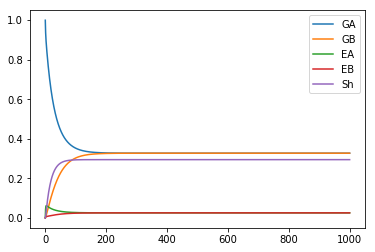

In [3]:
# initialize rate model
KineticTest = FiveLevelModel()

KineticTest.GetHelp()
KineticTest.GetModelHelp()
KineticTest.GetODEHelp()

# build rate param dictionary. By default, these params are all zero, so initialization is strictly necessary
KineticTestin = {}
KineticTestin['kradA'] = 1/1.3
KineticTestin['kradB'] = 1/1.3
KineticTestin['kupA'] = 0.1*KineticTestin['kradA']
KineticTestin['kupB'] = 0.1*KineticTestin['kradB']

KineticTestin['ISC'] = 0.3*KineticTestin['kradA']

KineticTestin['phi'] = 0.01
KineticTestin['ShG'] = 1/50
KineticTestin['phi_s'] = 1.0

# setting parameters and building the rate matrix
KineticTest.SetRateDict(KineticTestin)
KineticTest.BuildRateMatrix()

# setting numerical integration params
paramdict = {}
paramdict['t0'] = 0.0
paramdict['t1'] = 1000.0
paramdict['dt'] = 0.01
paramdict['initial_pops'] = np.asarray([1.,0.0,0.0,0.0,0.0])

# solving the rate equations
KineticTest.SetSolverParamaters(paramdict)
KineticTest.SolveRateEquations()

plt.figure()
[plt.plot(KineticTest.Results['timeax'],popvec,label=lab) for popvec,lab in zip(KineticTest.Results['pops_out'].T,KineticTest.Results['Labels'])]
plt.legend()
plt.show()

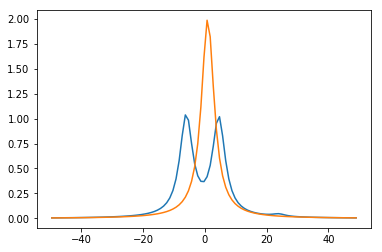

In [12]:
laserax = freqax

plt.figure()
plt.plot(freqax,spec[0,:])
plt.plot(freqax,spec[1,:])
plt.show()

model = FiveLevelModel()
rateparams = {}
rateparams['kradA'] = 1/1.3
rateparams['kradB'] = 1/1.3

rateparams['ISC'] = 0.1*rateparams['kradA']
rateparams['phi'] = 0.01
rateparams['ShG'] = 1/500
rateparams['phi_s'] = 1.0

paramdict = {}
paramdict['t0'] = 0.0
paramdict['t1'] = 1000.0
paramdict['dt'] = 0.01

ModelResults = {}   

In [13]:
paramdict['initial_pops'] = np.asarray([0.5,0.5,0.0,0.0,0.0])
model.SetSolverParamaters(paramdict)

alldata = []

for kupA,kupB in zip(spec[0,:],spec[1,:]):
    rateparams['kupA'] = 1/1.3*0.1*kupA
    rateparams['kupB'] = 1/1.3*0.1*kupB
    
    model.SetRateDict(rateparams)
    model.BuildRateMatrix()

    model.SolveRateEquations()
    alldata.append(model.Results['pops_out'])

ModelResults['NVcenter_Thermal'] = np.asarray(alldata)

In [14]:
paramdict['initial_pops'] = np.asarray([0.9,0.1,0.0,0.0,0.0])
model.SetSolverParamaters(paramdict)

alldata = []

for kupA,kupB in zip(spec[0,:],spec[1,:]):
    rateparams['kupA'] = 1/1.3*0.1*kupA
    rateparams['kupB'] = 1/1.3*0.1*kupB
    
    model.SetRateDict(rateparams)
    model.BuildRateMatrix()

    model.SolveRateEquations()
    alldata.append(model.Results['pops_out'])

ModelResults['NVcenter_ms1'] = np.asarray(alldata)

In [15]:
paramdict['initial_pops'] = np.asarray([0.1,0.9,0.0,0.0,0.0])
model.SetSolverParamaters(paramdict)

alldata = []

for kupA,kupB in zip(spec[0,:],spec[1,:]):
    rateparams['kupA'] = 1/1.3*0.1*kupA
    rateparams['kupB'] = 1/1.3*0.1*kupB
    
    model.SetRateDict(rateparams)
    model.BuildRateMatrix()

    model.SolveRateEquations()
    alldata.append(model.Results['pops_out'])

ModelResults['NVcenter_ms0'] = np.asarray(alldata)

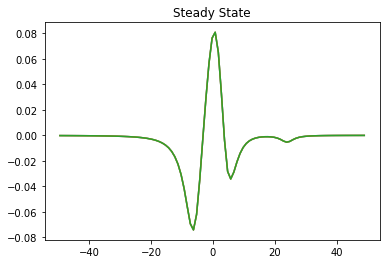

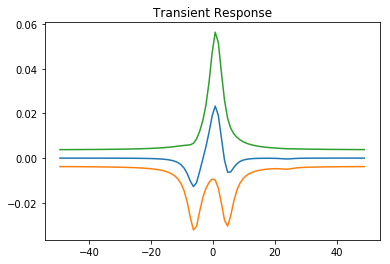

In [17]:
plt.figure()
plt.plot(laserax,ModelResults['NVcenter_Thermal'][:,-1,0]-ModelResults['NVcenter_Thermal'][:,-1,1])
plt.plot(laserax,ModelResults['NVcenter_ms1'][:,-1,0]-ModelResults['NVcenter_ms1'][:,-1,1])
plt.plot(laserax,ModelResults['NVcenter_ms0'][:,-1,0]-ModelResults['NVcenter_ms0'][:,-1,1])
plt.title('Steady State')
plt.show()

plt.figure()
plt.plot(laserax,ModelResults['NVcenter_Thermal'][:,50,0]-ModelResults['NVcenter_Thermal'][:,50,1])
plt.plot(laserax,ModelResults['NVcenter_ms1'][:,50,0]-ModelResults['NVcenter_ms1'][:,50,1]-0.8)
plt.plot(laserax,ModelResults['NVcenter_ms0'][:,50,0]-ModelResults['NVcenter_ms0'][:,50,1]+0.8)
plt.title('Transient Response')
plt.show()